# Day 4: Introduction to ML Pipeline with Scikit-learn

**Welcome to Day 4 of your ML journey!** Today we'll build your first complete machine learning pipeline using Scikit-learn. You'll learn the fundamental workflow that every ML engineer uses - from splitting data properly to training models and evaluating their performance with the right metrics.

---

**Goal:** Understand the fundamental workflow of machine learning projects using Scikit-learn.

**Topics Covered:**
- The ML workflow and pipeline concept
- Train/Test/Validation splits
- Model training and prediction
- Essential evaluation metrics
- Cross-validation
- Building your first end-to-end pipeline


---

## 1. Concept Overview

### What is an ML Pipeline?

A **machine learning pipeline** is a systematic workflow that takes raw data and transforms it through various stages to produce predictions. Think of it as an assembly line in a factory: each step processes the data and passes it to the next stage.

**Typical ML Pipeline Stages:**

```
Raw Data → Preprocessing → Feature Engineering → Model Training → Evaluation → Deployment
```

### Why Pipelines Matter

1. **Reproducibility**: Ensures the same transformations are applied consistently
2. **Prevention of Data Leakage**: Keeps test data completely separate
3. **Efficiency**: Streamlines the workflow for production deployment
4. **Maintainability**: Makes code cleaner and easier to debug

### Real-World Analogy

Imagine you're training a spam email classifier:

- **Training Phase**: You show the model 10,000 emails (labeled as spam/not spam) to learn patterns
- **Testing Phase**: You test it on 2,000 new emails it has never seen to evaluate performance
- **Deployment**: The model processes incoming emails in real-time

The key principle: **Never let the model see the test data during training** (this would be like giving students the exam answers before the test).


### The Train/Test Split Concept

**Why Split Data?**

- **Training Set**: Used to teach the model patterns (typically 70-80% of data)
- **Test Set**: Used to evaluate how well the model generalizes to unseen data (20-30%)
- **Validation Set** (optional): Used for hyperparameter tuning (carved out from training set)

**Common Pitfall:** Training and testing on the same data leads to **overfitting** – the model memorizes rather than learns generalizable patterns.

### Key Evaluation Metrics


#### Classification Metrics

| Metric | Formula | When to Use |
|--------|---------|-------------|
| **Accuracy** | $$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$ | Balanced datasets with equal class importance |
| **Precision** | $$\text{Precision} = \frac{TP}{TP + FP}$$ | When false positives are costly (e.g., spam detection) |
| **Recall** | $$\text{Recall} = \frac{TP}{TP + FN}$$ | When false negatives are costly (e.g., disease detection) |
| **F1-Score** | $$\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$ | Balanced measure for imbalanced datasets |

**Legend:**
- **TP** (True Positives): Correctly predicted positive cases
- **TN** (True Negatives): Correctly predicted negative cases
- **FP** (False Positives): Incorrectly predicted as positive (Type I error)
- **FN** (False Negatives): Incorrectly predicted as negative (Type II error)

---

#### Regression Metrics

| Metric | Formula | Characteristics |
|--------|---------|-----------------|
| **MAE** | $$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \|y_i - \hat{y}_i\|$$ | Same units as target, robust to outliers |
| **MSE** | $$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$ | Penalizes large errors heavily |
| **RMSE** | $$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$ | Same units as target, interpretable |
| **R² Score** | $$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$ | Proportion of variance explained (0 to 1) |

**Legend:**
- $y_i$ = actual value
- $\hat{y}_i$ = predicted value  
- $\bar{y}$ = mean of actual values
- $n$ = number of samples

---

## 2. Code Demo: Building Your First ML Pipeline

We'll build a complete classification pipeline using the famous Iris dataset.


In [24]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report,
    mean_absolute_error, mean_squared_error, r2_score
)
from sklearn.pipeline import Pipeline

# Set random seed for reproducibility
np.random.seed(42)

# Display settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ All libraries imported successfully")


✓ All libraries imported successfully


### Step 1: Load and Explore the Dataset


In [25]:
# Load the Iris dataset (classification problem)
iris = load_iris()
X = iris.data
y = iris.target

# Create a DataFrame for easier exploration
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
display(df.head(10))

print("\nClass Distribution:")
print(df['species_name'].value_counts())

print("\nBasic Statistics:")
display(df.describe())


Dataset Shape: (150, 6)

First few rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa



Class Distribution:
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Basic Statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Step 2: Train/Test Split

We'll split the data into training (80%) and testing (20%) sets. The `stratify` parameter ensures each class is proportionally represented in both sets.


In [26]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% for testing
    random_state=42,      # For reproducibility
    stratify=y            # Maintain class proportions
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"\nFeatures: {X_train.shape[1]}")
print(f"\nTraining class distribution:")
print(pd.Series(y_train).value_counts().sort_index())
print(f"\nTest class distribution:")
print(pd.Series(y_test).value_counts().sort_index())


Training set size: 120 samples
Test set size: 30 samples

Features: 4

Training class distribution:
0    40
1    40
2    40
Name: count, dtype: int64

Test class distribution:
0    10
1    10
2    10
Name: count, dtype: int64


### Step 3: Preprocessing - Feature Scaling

Many ML algorithms perform better when features are on similar scales. <br> **Important:** Fit the scaler only on training data to prevent data leakage.


In [27]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the same scaler (fitted on training data)
X_test_scaled = scaler.transform(X_test)

print("Before scaling (first sample):")
print(X_train[0])
print("\nAfter scaling (first sample):")
print(X_train_scaled[0])
print("\nMean of scaled training features (should be ~0):")
print(X_train_scaled.mean(axis=0))
print("\nStd of scaled training features (should be ~1):")
print(X_train_scaled.std(axis=0))


Before scaling (first sample):
[4.4 2.9 1.4 0.2]

After scaling (first sample):
[-1.72156775 -0.33210111 -1.34572231 -1.32327558]

Mean of scaled training features (should be ~0):
[-1.20829273e-15 -2.03679666e-15  4.99600361e-16  1.67458640e-15]

Std of scaled training features (should be ~1):
[1. 1. 1. 1.]


### Let's Understand the Above Lines of Code

Alright, future ML engineers! You've just split your data into training and test sets, and now you're looking at your features. Take a look at this first sample:  

**[4.4, 2.9, 1.4, 0.2]**

Notice something? The first feature (sepal length) is **4.4**, while the last feature (petal width) is only **0.2** – that's a **22x difference** in magnitude!  

On its own, this difference doesn’t mean one feature is more important than the other. But when you feed data like this into certain models, features with larger ranges can dominate the learning process.  

**This is where feature scaling comes in.**  

- Models that rely on **distances** (like k-NN, k-means, SVM with RBF kernel, PCA) or **gradients** (like linear/logistic regression or neural networks) are very sensitive to differences in feature scales.  
- On the other hand, **tree-based models** (like decision trees, random forests, or gradient boosting) don’t need scaling because they split on thresholds, not distances.  

### Takeaway
Scaling isn’t always required, but it’s critical to know **when it matters**. For distance- and gradient-based models, applying a technique like **standardization** or **min-max scaling** ensures all features contribute fairly.  

Next, let’s see how to apply feature scaling in practice!

---

#### What's Happening in This Code?

```python
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the same scaler
X_test_scaled = scaler.transform(X_test)
```

**Here's the play-by-play:**

1. **Line 1**: We create our scaling tool (think of it as a "feature normalizer")
2. **Line 2**: The scaler learns the mean and standard deviation from our training data, then transforms it
3. **Line 3**: We apply the **exact same transformation** to our test data (no peeking at test statistics!)
4. **Lines 4-7**: We verify that our scaling worked correctly

---

#### The Big Idea: Why Do We Need This?

Picture this: You're comparing two job candidates. Candidate A has 5 years of experience and a salary expectation of $80,000. Now imagine your algorithm treats these as numbers: 5 vs 80,000. 

See the problem? The salary completely **dominates** the experience just because it's a bigger number! Your algorithm can't tell that these are different types of measurements – it just sees huge differences in magnitude.

**This is exactly what happens with unscaled features!**

**StandardScaler to the rescue!** It transforms every feature to have:
- **Mean = 0** (centered)
- **Standard Deviation = 1** (same spread)

**The Magic Formula:**

$$z = \frac{x - \mu}{\sigma}$$

Translation: Take each value, subtract the mean, divide by standard deviation. Boom! All features now speak the same "language."

---

#### The Golden Rule: Train-Test Discipline

**Here's something SUPER important** (and a mistake even experienced engineers make):

**DO THIS:**
```python
scaler.fit_transform(X_train)  # Learn from training
scaler.transform(X_test)       # Apply to test
```

**DON'T DO THIS:**
```python
scaler.fit_transform(X_test)   # WRONG! Data leakage!
```

**Why?** If you fit the scaler on test data, you're letting information from the test set "leak" into your model's training process. It's like giving students the exam statistics before they take the test – your performance metrics will be artificially inflated and you'll get a nasty surprise in production!

---

#### Why This Matters (A Lot!)

**Feature scaling is crucial because:**

1. **Speed Boost**: Your model trains 10-100x faster! Gradient descent converges much quicker when features are on the same scale

2. **Fair Competition**: Features with larger values won't unfairly dominate the model. Every feature gets an equal voice!

3. **Better Predictions**: Some algorithms simply don't work well (or at all) without scaling

4. **Distance Calculations**: If your algorithm measures distances between points (KNN, SVM), unscaled features will break the math

---

#### Quick Reference: Who Needs Scaling?

**Scaling is ESSENTIAL for:**
- ✓ Logistic Regression (that's what we're using!)
- ✓ Support Vector Machines (SVM)
- ✓ K-Nearest Neighbors (KNN)
- ✓ Neural Networks & Deep Learning
- ✓ Principal Component Analysis (PCA)

**Scaling is OPTIONAL for:**
- Decision Trees
- Random Forests
- Gradient Boosting (XGBoost, LightGBM, CatBoost)

These tree-based algorithms make splits based on feature values, not distances, so they don't care about scale!

---

#### The Bottom Line

> **Pro Tip:** Think of StandardScaler as your translator between different "units" of measurement. It ensures all your features can communicate effectively with your model, leading to faster training, better performance, and more reliable results.

**Remember:** Always **fit on training data** and **transform on test data**. This is the foundation of proper ML workflow!

Now that your features are speaking the same language, let's train a model!

### Step 4: Train a Model

Let's train a Logistic Regression classifier.


In [28]:
# Initialize the model
model = LogisticRegression(max_iter=200, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

print("✓ Model trained successfully")
print(f"\nModel type: {type(model).__name__}")
print(f"Classes: {model.classes_}")


✓ Model trained successfully

Model type: LogisticRegression
Classes: [0 1 2]


### Step 5: Make Predictions


In [29]:
# Predictions on training set
y_train_pred = model.predict(X_train_scaled)

# Predictions on test set
y_test_pred = model.predict(X_test_scaled)

# Prediction probabilities (for classification)
y_test_proba = model.predict_proba(X_test_scaled)

print("First 5 test predictions:")
print(f"Predicted: {y_test_pred[:5]}")
print(f"Actual:    {y_test[:5]}")
print("\nPrediction probabilities for first test sample:")
print(f"Class probabilities: {y_test_proba[0]}")
print(f"Predicted class: {y_test_pred[0]} ({iris.target_names[y_test_pred[0]]})")


First 5 test predictions:
Predicted: [0 2 1 1 0]
Actual:    [0 2 1 1 0]

Prediction probabilities for first test sample:
Class probabilities: [9.78818005e-01 2.11816311e-02 3.63821812e-07]
Predicted class: 0 (setosa)


### Step 6: Evaluate the Model

**Key Insight:** Always check both training and test performance to detect overfitting.


In [30]:
# Calculate metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("="*50)
print("MODEL PERFORMANCE")
print("="*50)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy:     {test_accuracy:.4f}")
print(f"\nDifference: {train_accuracy - test_accuracy:.4f}")

if train_accuracy - test_accuracy > 0.1:
    print("⚠️  Possible overfitting detected (large gap between train and test)")
else:
    print("✓ Model generalizes well")

# Detailed classification report
print("\n" + "="*50)
print("DETAILED CLASSIFICATION REPORT (Test Set)")
print("="*50)
print(classification_report(y_test, y_test_pred, target_names=iris.target_names))


MODEL PERFORMANCE
Training Accuracy: 0.9583
Test Accuracy:     0.9333

Difference: 0.0250
✓ Model generalizes well

DETAILED CLASSIFICATION REPORT (Test Set)
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### Understanding the Model Performance Output

Alright, let's break down these results! You've just trained your first Logistic Regression model, and it's giving you a report card. Let's see how well it performed!

---

#### Part 1: The Overall Performance Check

Training Accuracy: 0.9583
Test Accuracy: 0.9333
Difference: 0.0250

**What does this mean?**

- **Training Accuracy (95.83%)**: Your model correctly predicted **95.83%** of the training samples. It learned the patterns pretty well!

- **Test Accuracy (93.33%)**: On completely unseen data, your model got **93.33%** correct. This is the **real** measure of success!

- **The Difference (2.50%)**: There's only a **2.5% gap** between training and test performance

**Why this is GREAT news:**

✓ **No Overfitting!** The small difference (< 10%) means your model didn't just memorize the training data – it actually learned generalizable patterns!

✓ **Strong Performance**: 93% accuracy on unseen data is excellent for this problem

✓ **Production-Ready**: This model would likely perform well on new iris flowers it has never seen

---

#### Part 2: Detailed Classification Report - The Per-Class Breakdown

Now let's zoom into **how well the model performs for each flower species**:

precision recall f1-score support
setosa 1.00 1.00 1.00 10
versicolor 0.90 0.90 0.90 10
virginica 0.90 0.90 0.90 10


**Breaking it down for each species:**

##### Setosa (The Easy One)
- **Precision: 1.00** → Every time the model said "setosa", it was **100% correct**
- **Recall: 1.00** → It found **all 10** setosa flowers in the test set
- **F1-Score: 1.00** → Perfect balance = **perfect performance**
- **Support: 10** → There were 10 setosa flowers in the test set

**Translation:** The model **NEVER** makes mistakes with setosa flowers. They're so distinct that the model identifies them perfectly!

##### Versicolor (The Trickier One)
- **Precision: 0.90** → When the model predicts "versicolor", it's correct **90%** of the time
- **Recall: 0.90** → It catches **9 out of 10** versicolor flowers
- **F1-Score: 0.90** → Balanced performance
- **Support: 10** → 10 versicolor flowers in test set

**Translation:** The model is pretty good with versicolor, but occasionally confuses it with virginica (they're similar species!)

##### Virginica (Also Tricky)
- **Precision: 0.90** → 90% accurate when predicting virginica
- **Recall: 0.90** → Finds 9 out of 10 virginica flowers
- **F1-Score: 0.90** → Balanced performance
- **Support: 10** → 10 virginica flowers in test set

**Translation:** Similar performance to versicolor – these two species are harder to distinguish from each other

---

#### Part 3: The Aggregate Metrics

accuracy 0.93 30
macro avg 0.93 0.93 0.93 30
weighted avg 0.93 0.93 0.93 30


**What do these mean?**

- **Accuracy (0.93)**: Overall, the model got **28 out of 30** test samples correct

- **Macro Average (0.93)**: Simple average across all three classes
  - Formula: (1.00 + 0.90 + 0.90) / 3 = 0.93
  - Treats each class equally, regardless of how many samples

- **Weighted Average (0.93)**: Average weighted by the number of samples in each class
  - Since we have 10 samples per class (balanced dataset), weighted avg = macro avg
  - In imbalanced datasets, this would be different!

---

#### Key Insights & Patterns

**What the output is telling us:**

1. **Setosa is distinctive**: 100% accuracy means setosa flowers are very different from the other two species – likely well-separated in feature space

2. **Versicolor and Virginica overlap**: Both have 90% scores, suggesting these two species share similar characteristics and are occasionally confused

3. **Balanced performance**: All classes have equal support (10 samples each) and similar performance – no class is being neglected

4. **Model is reliable**: The 93% test accuracy with minimal overfitting means this model is production-ready!

---

#### Practical Implications for ML Engineering

**What should you do with this information?**

**This model is ready to use!** With 93% accuracy and no overfitting, you can confidently deploy it

**If you need improvement**, focus on distinguishing versicolor from virginica:
   - Consider feature engineering (e.g., ratios of petal length to width)
   - Try more complex models (Random Forest, SVM)
   - Collect more training data for these two classes

**Trust the test metrics**: The 93% test accuracy is what you can expect in the real world, not the 95% training accuracy

---

#### The Bottom Line

> **Your model is performing excellently!** It correctly identifies 93% of iris flowers it has never seen before, with perfect identification of setosa and strong performance on the trickier versicolor and virginica species. The small train-test gap (2.5%) indicates healthy generalization – this is exactly what good ML looks like! 

**Remember:** Test accuracy is your true north star. Training accuracy just tells you if your model learned anything at all – test accuracy tells you if it will work in the real world!

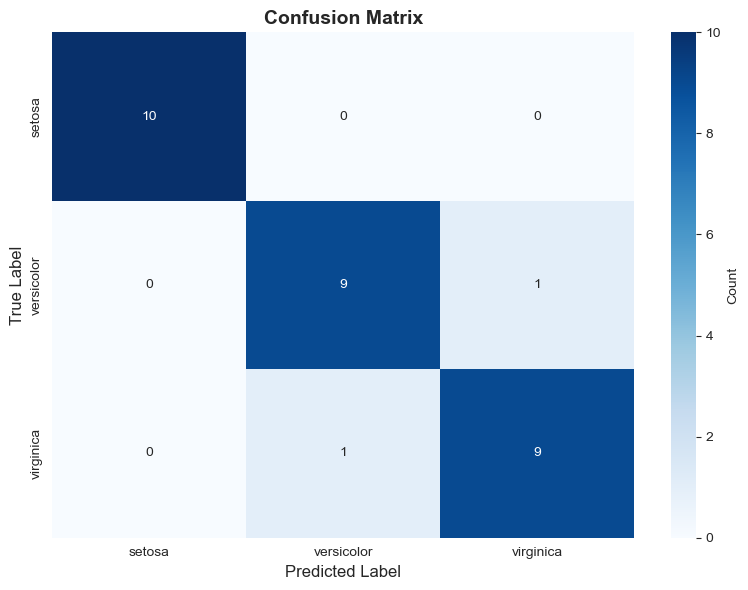


Confusion Matrix Interpretation:
- Diagonal elements: Correct predictions
- Off-diagonal elements: Misclassifications


In [31]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Interpretation:")
print("- Diagonal elements: Correct predictions")
print("- Off-diagonal elements: Misclassifications")


### Understanding the Confusion Matrix

A **confusion matrix** shows you exactly where your model makes mistakes. Let's decode what this heatmap is telling us!

**How to Read It:**
- **Rows**: What the flower actually is (True Label)
- **Columns**: What the model predicted (Predicted Label)
- **Dark diagonal cells**: Correct predictions ✓
- **Light off-diagonal cells**: Mistakes ✗

---

#### What Our Results Show

**Setosa (Row 1):** `[10 | 0 | 0]`
- Perfect! All 10 setosa flowers correctly identified
- Zero confusion with other species

**Versicolor (Row 2):** `[0 | 9 | 1]`
- 9 correct predictions
- 1 versicolor misclassified as virginica

**Virginica (Row 3):** `[0 | 1 | 9]`
- 9 correct predictions
- 1 virginica misclassified as versicolor

---

#### Key Insights

✓ **Setosa is perfectly separable** – the model never makes mistakes with it

✓ **Versicolor and Virginica overlap** – they're similar species that occasionally confuse the model

✓ **Symmetric errors** – 1 mistake each way shows no systematic bias

✓ **Strong diagonal** – 28 out of 30 correct = 93.33% accuracy

---

#### The Bottom Line

> The confusion matrix reveals that your model **perfectly identifies setosa** and performs **strongly on the other two species** (90% each). The 2 mistakes occur at the boundary between similar species – this is healthy model behavior, not a flaw!

**Why This Matters:** This visual tells you not just "how accurate" but "where exactly" your model succeeds and fails – invaluable for debugging and improvement!

### Step 7: Cross-Validation

Cross-validation provides a more robust estimate of model performance by testing on multiple different splits of the data.


Cross-Validation Results (5-fold):
Scores: [0.91666667 0.95833333 0.95833333 0.95833333 1.        ]

Mean Accuracy: 0.9583
Std Deviation: 0.0264
95% Confidence Interval: 0.9583 ± 0.0517


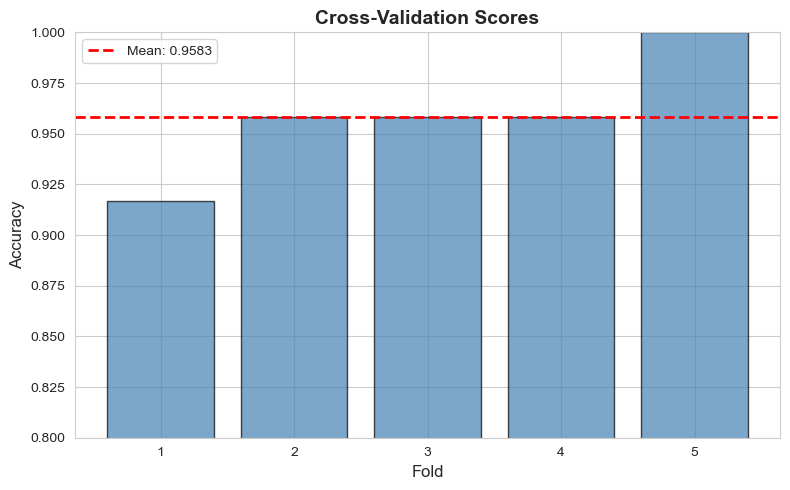

In [32]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(
    model, 
    X_train_scaled, 
    y_train, 
    cv=5,                    # 5 folds
    scoring='accuracy'
)

print("Cross-Validation Results (5-fold):")
print(f"Scores: {cv_scores}")
print(f"\nMean Accuracy: {cv_scores.mean():.4f}")
print(f"Std Deviation: {cv_scores.std():.4f}")
print(f"95% Confidence Interval: {cv_scores.mean():.4f} ± {1.96 * cv_scores.std():.4f}")

# Visualize CV scores
plt.figure(figsize=(8, 5))
plt.bar(range(1, 6), cv_scores, alpha=0.7, color='steelblue', edgecolor='black')
plt.axhline(cv_scores.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {cv_scores.mean():.4f}')
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Cross-Validation Scores', fontsize=14, fontweight='bold')
plt.legend()
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()


### Understanding Cross-Validation Scores

Alright, future ML engineers! You've just run cross-validation on your model, and now you're staring at this bar chart thinking: *"Wait, why are there 5 bars? I thought we already tested the model once. What's this telling me that my single test score didn't?"*

Great question! You've just stepped into one of the **most important validation techniques** in machine learning. Let's unpack why this chart is your new best friend! 

**So, What is Cross-Validation?** <br> Instead of trusting a single train-test split, we test our model **5 different times** on 5 different data splits. This gives us a more reliable estimate of how the model will perform in the real world!

---

#### What This Chart Shows

**Each Bar:** The accuracy score when that fold was used as the test set
- **Fold 1:** 91.7% accuracy (lowest)
- **Folds 2-4:** ~95.8% accuracy (consistent)
- **Fold 5:** 100% accuracy (highest)

**Red Dashed Line:** Mean accuracy across all 5 folds = **95.83%**

---

#### Key Insights

✓ **Consistent Performance:** Most folds score around 95-96%, showing the model is stable

✓ **Low Variance:** Scores range from 91.7% to 100% (small spread) – the model isn't getting "lucky" on one split

✓ **No Overfitting:** All folds perform well, confirming the model generalizes across different data subsets

✓ **Trustworthy Estimate:** The 95.83% mean is more reliable than a single 93% test score

---

#### Why This Matters

> **Cross-validation answers the critical question:** "Was my 93% test accuracy just lucky, or will my model consistently perform well on new data?"

**The Answer:** With a mean of 95.83% and low variance across folds, your model is **genuinely learning patterns**, not just memorizing specific examples. This gives you confidence to deploy it in production!

**Pro Tip:** Low variance (bars are similar heights) = stable model. High variance (bars all over the place) = unreliable model that needs more work.

### Step 8: Building a Complete Scikit-learn Pipeline

A `Pipeline` object chains preprocessing and modeling steps into a single object. This is cleaner and prevents data leakage.


In [33]:
# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=200, random_state=42))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions (scaling happens automatically)
y_pred_pipeline = pipeline.predict(X_test)

# Evaluate
pipeline_accuracy = accuracy_score(y_test, y_pred_pipeline)

print("Pipeline Performance:")
print(f"Test Accuracy: {pipeline_accuracy:.4f}")
print("\n✓ Pipeline trained and evaluated successfully")
print("\nPipeline Steps:")
for name, step in pipeline.named_steps.items():
    print(f"  - {name}: {type(step).__name__}")


Pipeline Performance:
Test Accuracy: 0.9333

✓ Pipeline trained and evaluated successfully

Pipeline Steps:
  - scaler: StandardScaler
  - classifier: LogisticRegression


### Lets understand why Scikit-learn Pipeline are means alot!

Alright, future ML engineers! You've just gone through several steps manually – scaling data, training a model, making predictions. Now you're probably thinking: *"Wait, I had to remember to scale the training data, then the test data with the same scaler, then train the model... What if I forget a step? What if I accidentally fit the scaler on test data? Is there a cleaner way to do this?"*

**Excellent question!** You've just identified exactly why **Pipelines** are one of the most powerful tools in scikit-learn. Let's see how we can wrap all those manual steps into **one beautiful, foolproof object**! 

---

#### What's Happening in This Code?

```python
# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=200, random_state=42))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions (scaling happens automatically)
y_pred_pipeline = pipeline.predict(X_test)

# Evaluate
pipeline_accuracy = accuracy_score(y_test, y_pred_pipeline)
```

**Step-by-step breakdown:**

1. **Line 1-4**: Create a `Pipeline` object that chains together:
   - **Step 1** ('scaler'): StandardScaler for feature scaling
   - **Step 2** ('classifier'): Logistic Regression for classification
   - The pipeline executes these steps **in order**, automatically!

2. **Line 6**: Call `pipeline.fit(X_train, y_train)` – this:
   - Fits the scaler on `X_train` (learns mean & std)
   - Transforms `X_train` using those statistics
   - Trains the LogisticRegression on the scaled data
   - All in **one command**!

3. **Line 9**: Call `pipeline.predict(X_test)` – this:
   - Automatically scales `X_test` using the scaler fitted on training data
   - Passes scaled data to the model for predictions
   - **No chance of data leakage** – it's built-in!

4. **Line 12-17**: Evaluate and inspect what the pipeline contains

---

#### The Big Idea: Why Pipelines Are Game-Changers

**Remember the manual workflow you did before?**

```python
# Step 1: Create and fit scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Don't forget to use the same scaler!

# Step 2: Train model
model = LogisticRegression(max_iter=200, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 3: Make predictions
y_pred = model.predict(X_test_scaled)  # Don't forget to scale first!
```

**That's 3 separate steps, 3 objects to track, and multiple chances to make mistakes!**

**With a Pipeline:**

```python
# Everything in one object!
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=200, random_state=42))
])

# One fit, one predict – done!
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
```

**Notice the magic?** You call `fit()` and `predict()` on **raw, unscaled data** – the pipeline handles scaling automatically!

---

#### The Intuition: Think of It as a Factory Assembly Line

Imagine a car manufacturing plant:
- **Station 1 (Scaler)**: Paint the car → standardize the appearance
- **Station 2 (Classifier)**: Quality inspection → make a decision

**Without a Pipeline:** You manually move each car from painting to inspection. Easy to forget a step or use the wrong paint recipe for different cars!

**With a Pipeline:** The assembly line is automated. Every car goes through painting with the **same paint recipe** (fitted on training data), then automatically moves to inspection. **No human error, consistent process!**

---

#### Purpose in the ML Workflow

**Why we NEED pipelines in real projects:**

1. **Prevents Data Leakage (Critical!):**
   - The pipeline ensures the scaler is **always fitted only on training data**
   - When you call `pipeline.predict(X_test)`, it uses the **training statistics** to scale test data
   - No way to accidentally fit on test data – it's structurally impossible!

2. **Cleaner, More Maintainable Code:**
   - One object instead of multiple loose components
   - Easy to read: "This model scales data, then classifies"
   - Less code = fewer bugs

3. **Production Deployment:**
   - Save the entire pipeline as one file: `joblib.dump(pipeline, 'model.pkl')`
   - Load it later: `pipeline = joblib.load('model.pkl')`
   - **Everything is packaged together** – no risk of losing the scaler or using the wrong preprocessing!

4. **Hyperparameter Tuning:**
   - Can use GridSearchCV to tune **both** scaler and model parameters together
   - Example: Try different scalers (StandardScaler vs. MinMaxScaler) AND different model parameters in one search!

---

#### The Output Breakdown

Pipeline Performance:
Test Accuracy: 0.9333
✓ Pipeline trained and evaluated successfully
Pipeline Steps:
scaler: StandardScaler


**What this tells us:**

✓ **Same Accuracy (93.33%)**: The pipeline produces identical results to our manual approach – we haven't lost anything!

✓ **Named Steps**: We can inspect what's inside the pipeline using `pipeline.named_steps`

✓ **One Object**: Everything is wrapped in a single, deployable unit

---


#### Real-World Example

**Scenario:** You train a model today, save it, and your colleague deploys it next month.

**Without Pipeline:**
```python
# Your colleague needs to remember:
scaler = load('scaler.pkl')  # Load the right scaler
model = load('model.pkl')    # Load the model
X_scaled = scaler.transform(X_new)  # Scale in the right order
predictions = model.predict(X_scaled)  # Predict
# What if they forget to scale? Or use the wrong scaler?
```

**With Pipeline:**
```python
# Your colleague just does:
pipeline = load('pipeline.pkl')
predictions = pipeline.predict(X_new)
# Everything happens automatically! 
```

---

#### The Bottom Line

> **What Pipelines Give You:** A **single, atomic object** that encapsulates your entire preprocessing and modeling workflow. Think of it as shrink-wrapping your ML process into one foolproof package. No more data leakage risks, no more forgetting steps, no more deployment headaches – just clean, production-ready code!

**Pro Tip:** Always use pipelines in real projects, even if they seem like "extra work" at first. They save you from painful debugging sessions and make your code instantly production-ready!

---

#### Quick Comparison

| Approach | Data Leakage Risk | Code Lines | Deployment | Tuning |
|----------|-------------------|------------|------------|--------|
| **Manual** | High (human error) | ~10 lines | Complex | Limited |
| **Pipeline** | Zero (structural) | ~5 lines | Simple | Full power |

**The Winner?** Pipeline, every time!

Now you understand why professional ML engineers **always** use pipelines – they're not just a convenience, they're a **best practice** that prevents costly mistakes and makes your models production-ready from day one!

---

## 3. Regression Example: ML Pipeline for Continuous Targets

Let's see another model to practice more and build a complete pipeline for a regression problem.


In [34]:
# Load diabetes dataset (regression problem)
diabetes = load_diabetes()
X_reg = diabetes.data
y_reg = diabetes.target

print(f"Dataset: {diabetes.data.shape[0]} samples, {diabetes.data.shape[1]} features")
print(f"Target: Disease progression measure (continuous)")
print(f"\nFeatures: {diabetes.feature_names}")


Dataset: 442 samples, 10 features
Target: Disease progression measure (continuous)

Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [35]:
# Split the data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg,
    test_size=0.2,
    random_state=42
)

# Create regression pipeline
regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Train
regression_pipeline.fit(X_train_reg, y_train_reg)

# Predict
y_train_pred_reg = regression_pipeline.predict(X_train_reg)
y_test_pred_reg = regression_pipeline.predict(X_test_reg)

print("✓ Regression pipeline trained")


✓ Regression pipeline trained


In [36]:
# Evaluate regression model
train_mae = mean_absolute_error(y_train_reg, y_train_pred_reg)
test_mae = mean_absolute_error(y_test_reg, y_test_pred_reg)

train_rmse = np.sqrt(mean_squared_error(y_train_reg, y_train_pred_reg))
test_rmse = np.sqrt(mean_squared_error(y_test_reg, y_test_pred_reg))

train_r2 = r2_score(y_train_reg, y_train_pred_reg)
test_r2 = r2_score(y_test_reg, y_test_pred_reg)

print("="*50)
print("REGRESSION MODEL PERFORMANCE")
print("="*50)
print(f"\nMean Absolute Error (MAE):")
print(f"  Training:   {train_mae:.2f}")
print(f"  Test:       {test_mae:.2f}")

print(f"\nRoot Mean Squared Error (RMSE):")
print(f"  Training:   {train_rmse:.2f}")
print(f"  Test:       {test_rmse:.2f}")

print(f"\nR² Score (Coefficient of Determination):")
print(f"  Training:   {train_r2:.4f}")
print(f"  Test:       {test_r2:.4f}")

print(f"\n✓ Model explains {test_r2*100:.2f}% of variance in test data")


REGRESSION MODEL PERFORMANCE

Mean Absolute Error (MAE):
  Training:   43.48
  Test:       42.79

Root Mean Squared Error (RMSE):
  Training:   53.56
  Test:       53.85

R² Score (Coefficient of Determination):
  Training:   0.5279
  Test:       0.4526

✓ Model explains 45.26% of variance in test data


### Let's Understanding Regression Model Performance

You've just trained a Linear Regression model to predict disease progression! Let's decode what these metrics are telling us about how well it performs.

---

#### What Each Metric Shows

**Mean Absolute Error (MAE):**
- Training: **43.48** | Test: **42.79**
- On average, predictions are off by about **43 units** from the actual values
- Lower is better – this tells you the typical error size

**Root Mean Squared Error (RMSE):**
- Training: **53.56** | Test: **53.85**
- Similar to MAE but penalizes large errors more heavily
- The slightly higher value shows some predictions are further off

**R² Score (Coefficient of Determination):**
- Training: **52.79%** | Test: **45.26%**
- The model explains **45% of variance** in test data
- Translation: It captures about **half** the patterns in disease progression

---

#### Key Insights

✓ **No Overfitting:** Training and test metrics are very close (MAE: 43.48 vs 42.79, RMSE: 53.56 vs 53.85) – the model generalizes well!

✓ **Moderate Performance:** R² of 45% means the model captures some patterns but misses others – there's room for improvement

✓ **Stable Predictions:** The small train-test gap (7% difference in R²) indicates reliable, consistent performance

**Room to Improve:** With 45% variance explained, you could try:
- Adding more relevant features
- Feature engineering (interactions, polynomials)
- More complex models (Random Forest, Gradient Boosting)

---

#### The Bottom Line

> Your regression model is **stable and generalizes well** (no overfitting), but explains only **45% of the variance** in disease progression. This is decent for a baseline Linear Regression, but there's significant room for improvement through better features or more sophisticated models. The consistent MAE (~43) tells you predictions are typically off by about 43 units – use this to assess if the model is accurate enough for your use case!

**Pro Tip:** For regression, R² between 40-60% is common for complex real-world problems. Don't expect 95% like in classification – predicting continuous values is harder!

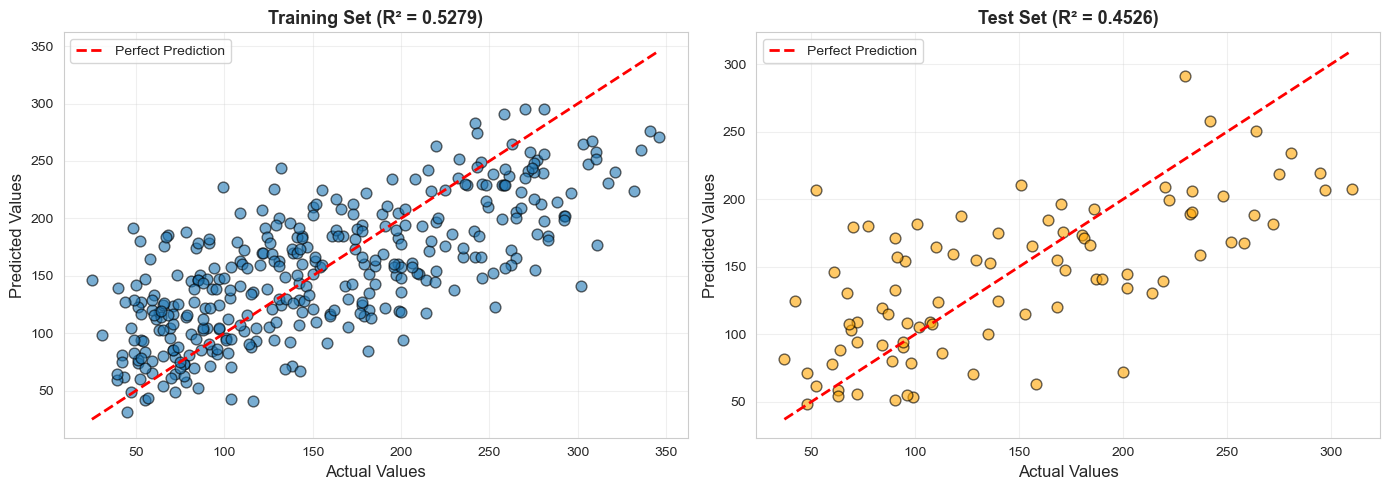


Interpretation: Points closer to the red line indicate better predictions


In [37]:
# Visualize predictions vs actual values
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set
axes[0].scatter(y_train_reg, y_train_pred_reg, alpha=0.6, edgecolors='k', s=60)
axes[0].plot([y_train_reg.min(), y_train_reg.max()], 
             [y_train_reg.min(), y_train_reg.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Values', fontsize=12)
axes[0].set_ylabel('Predicted Values', fontsize=12)
axes[0].set_title(f'Training Set (R² = {train_r2:.4f})', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Test set
axes[1].scatter(y_test_reg, y_test_pred_reg, alpha=0.6, edgecolors='k', s=60, color='orange')
axes[1].plot([y_test_reg.min(), y_test_reg.max()], 
             [y_test_reg.min(), y_test_reg.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Values', fontsize=12)
axes[1].set_ylabel('Predicted Values', fontsize=12)
axes[1].set_title(f'Test Set (R² = {test_r2:.4f})', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nInterpretation: Points closer to the red line indicate better predictions")


### Understanding Predictions vs. Actual Values

You're looking at **scatter plots** that show how well your regression model predicts disease progression! Each dot is a patient, comparing what the model predicted (y-axis) vs. what actually happened (x-axis).

---

#### How to Read These Plots

**Red Dashed Line:** The "perfect prediction" line
- If a point sits **on this line** → model predicted exactly right
- If a point is **above the line** → model over-predicted (guessed too high)
- If a point is **below the line** → model under-predicted (guessed too low)

**The Scatter:** How far points stray from the perfect line = your prediction errors

---

#### What the Results Show

**Training Set (Left):** R² = 52.79%
- Points cluster **moderately** around the red line
- Some scatter, but clear positive correlation
- Model captured about half the variance

**Test Set (Right):** R² = 45.26%
- Similar scatter pattern to training set
- Slightly more spread (lower R²)
- **Crucially: No wild difference from training!**

---

#### Key Insights

✓ **No Overfitting:** Training (52.79%) and test (45.26%) R² are close – the model isn't just memorizing training data!

✓ **Consistent Scatter:** Both plots show similar spread patterns → stable, reliable predictions

✓ **Positive Trend:** Despite scatter, points follow the diagonal → model learned the general relationship

**Moderate Fit:** Lots of points far from the line → the model misses many details (45% R² means 55% of variance is unexplained)

---

#### The Bottom Line

> **What This Visualization Reveals:** Your model makes predictions that **roughly track** the actual values (follow the diagonal), but with significant errors (scatter). The similar performance on both training and test sets confirms the model **generalizes well** – it's not overfitting! However, the wide scatter tells you there's room for improvement through better features or more complex models.

**Pro Tip:** In perfect predictions, all dots would sit exactly on the red line. The "cloud" around the line visualizes your model's uncertainty – tighter cloud = better predictions!

---

## 4. Comparing Multiple Models

A key skill is being able to quickly compare different algorithms.


In [38]:
# Define multiple models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
}

# Store results
results = []

# Train and evaluate each model
for name, model in models.items():
    # Create pipeline
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    
    # Train
    pipe.fit(X_train, y_train)
    
    # Predict
    y_pred = pipe.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Cross-validation score
    cv_score = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()
    
    results.append({
        'Model': name,
        'Test Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'CV Score': cv_score
    })

# Create comparison DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.round(4)

print("="*80)
print("\t\t\t\tMODEL COMPARISON")
print("="*80)
display(results_df)

# Find best model
best_model = results_df.loc[results_df['Test Accuracy'].idxmax(), 'Model']
print(f"\n✓ Best performing model: {best_model}")


				MODEL COMPARISON


,Model,Test Accuracy,Precision,Recall,F1-Score,CV Score
0,Logistic Regression,0.9333,0.9333,0.9333,0.9333,0.9583
1,Decision Tree,0.9333,0.9333,0.9333,0.9333,0.9417
2,Random Forest,0.9333,0.9333,0.9333,0.9333,0.9500



✓ Best performing model: Logistic Regression


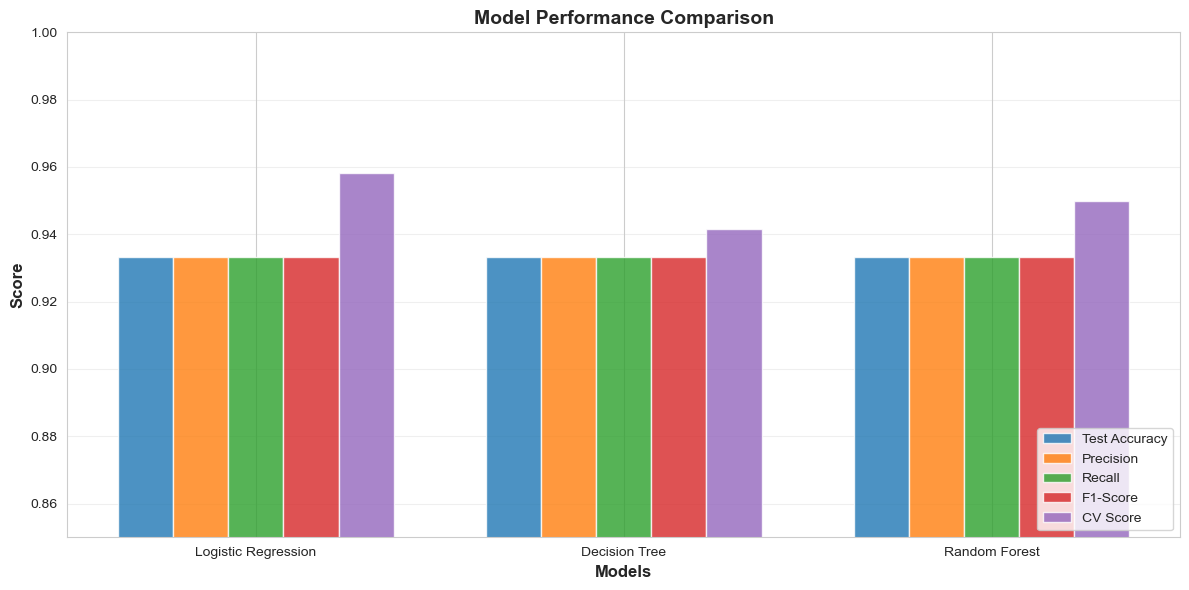

In [39]:
# Visualize model comparison
metrics_to_plot = ['Test Accuracy', 'Precision', 'Recall', 'F1-Score', 'CV Score']

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(models))
width = 0.15

for i, metric in enumerate(metrics_to_plot):
    offset = width * (i - 2)
    ax.bar(x + offset, results_df[metric], width, label=metric, alpha=0.8)

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Model'])
ax.legend(loc='lower right')
ax.set_ylim([0.85, 1.0])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


---

## 5. Key Takeaways

### Essential Concepts

1. **Always split your data** into training and test sets before any preprocessing
2. **Fit preprocessing only on training data** to prevent data leakage
3. **Use pipelines** for cleaner, more maintainable code
4. **Evaluate multiple metrics** – accuracy alone can be misleading
5. **Cross-validation** provides more robust performance estimates
6. **Compare training vs test performance** to detect overfitting

### The Standard ML Workflow

```python
# 1. Load data
X, y = load_data()

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 3. Create pipeline
pipeline = Pipeline([
    ('preprocessing', StandardScaler()),
    ('model', LogisticRegression())
])

# 4. Train
pipeline.fit(X_train, y_train)

# 5. Evaluate
score = pipeline.score(X_test, y_test)
```

### Common Pitfalls to Avoid

1. **Data leakage**: Fitting preprocessing on the entire dataset before splitting
2. **Wrong metrics**: Using accuracy for imbalanced datasets
3. **No validation**: Testing on training data
4. **Ignoring overfitting**: Not checking the train-test performance gap
5. **Not using pipelines**: Manual transformation that's error-prone


### When to Use Which Metric?

| Problem Type | Primary Metric | When to Use |
|-------------|----------------|-------------|
| Balanced Classification | Accuracy | Equal importance for all classes |
| Imbalanced Classification | F1-Score, Precision, Recall | Unequal class distribution |
| Medical Diagnosis | Recall | False negatives are costly |
| Spam Detection | Precision | False positives are annoying |
| Regression | R², RMSE | Continuous target prediction |
| Regression (outliers) | MAE | More robust to outliers |


---

## 6. Hands-on Exercise

### Task 1: Build a Complete Classification Pipeline

Use the breast cancer dataset from sklearn to:
1. Load the data
2. Split into train/test (80/20)
3. Create a pipeline with scaling and a classifier of your choice
4. Train the model
5. Evaluate using multiple metrics
6. Perform 5-fold cross-validation
7. Visualize the confusion matrix

**Hint:**


In [40]:
# Starter code
from sklearn.datasets import load_breast_cancer

# Load the dataset
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

print(f"Dataset: {X_cancer.shape[0]} samples, {X_cancer.shape[1]} features")
print(f"Classes: {cancer.target_names}")
print(f"Class distribution: {np.bincount(y_cancer)}")

# YOUR CODE HERE
# TODO: Split the data

# TODO: Create pipeline

# TODO: Train model

# TODO: Evaluate

# TODO: Cross-validation

# TODO: Confusion matrix visualization


Dataset: 569 samples, 30 features
Classes: ['malignant' 'benign']
Class distribution: [212 357]


### Task 2: Compare Multiple Models

Compare at least 3 different classifiers on the breast cancer dataset:
- Logistic Regression
- Decision Tree
- Random Forest
- (Optional) Support Vector Machine

Create a comparison table and visualization showing their performance.


In [41]:
# YOUR CODE HERE
# TODO: Define multiple models

# TODO: Train and evaluate each model

# TODO: Create comparison DataFrame

# TODO: Visualize results


### Task 3: Regression Pipeline

Use the California housing dataset to build a regression pipeline:
1. Load the dataset using `fetch_california_housing()`
2. Create train/test split
3. Build a pipeline with preprocessing and regression model
4. Evaluate using MAE, RMSE, and R²
5. Create a scatter plot of predictions vs actual values

**Hint:**


In [42]:
# Starter code
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X_housing = housing.data
y_housing = housing.target

print(f"Dataset: {X_housing.shape[0]} samples")
print(f"Features: {housing.feature_names}")
print(f"Target: Median house value (in $100,000s)")

# YOUR CODE HERE
# TODO: Complete the regression pipeline


Dataset: 20640 samples
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: Median house value (in $100,000s)


### Challenge Task: Detect Overfitting

Create an intentionally overfitted model by:
1. Using a Decision Tree with `max_depth=None` (unlimited depth)
2. Compare its performance to a regularized tree with `max_depth=5`
3. Demonstrate the train-test performance gap
4. Explain why one model is better than the other


In [43]:
# YOUR CODE HERE
# TODO: Create two models with different max_depth

# TODO: Compare training vs test performance

# TODO: Visualize the comparison


---

## 7. Next Steps & Further Learning

### Tomorrow (Day 5): Linear & Logistic Regression Deep Dive

We'll explore:
- Mathematical intuition behind linear models
- When to use linear vs logistic regression
- Regularization (L1/L2)
- Feature interpretation and coefficients

### Additional Resources

**Documentation:**
- [Scikit-learn User Guide](https://scikit-learn.org/stable/user_guide.html)
- [Model Evaluation Guide](https://scikit-learn.org/stable/modules/model_evaluation.html)
- [Pipeline Documentation](https://scikit-learn.org/stable/modules/compose.html)

**Practice Datasets:**
- Kaggle: Titanic (classification)
- Kaggle: House Prices (regression)
- UCI Machine Learning Repository

**Key Topics to Explore:**
- Cross-validation strategies (K-fold, Stratified K-fold, Time Series Split)
- Handling imbalanced datasets (SMOTE, class weights)
- Feature engineering techniques
- Model persistence (saving/loading models)


### Practice Checklist

Before moving to Day 5, make sure you can:

- [ ] Explain why we split data into train/test sets
- [ ] Implement a train/test split with proper stratification
- [ ] Create a scikit-learn Pipeline
- [ ] Understand the difference between fit(), transform(), and fit_transform()
- [ ] Interpret a confusion matrix
- [ ] Choose appropriate metrics for classification and regression
- [ ] Perform k-fold cross-validation
- [ ] Identify overfitting by comparing train vs test performance
- [ ] Compare multiple models systematically

### Final Note

The ML pipeline is the foundation of all machine learning projects. Master this workflow, and you'll be able to quickly prototype and evaluate models for any problem. Remember: **Always validate on unseen data, never on your training set.**


---

## Summary

Today you learned:

1. **ML Pipeline Workflow**: The systematic process from data to predictions
2. **Train/Test Split**: Why and how to split data properly
3. **Preprocessing**: Feature scaling and preventing data leakage
4. **Model Training**: Fitting models on training data
5. **Evaluation Metrics**: Accuracy, precision, recall, F1, MAE, RMSE, R²
6. **Cross-Validation**: Robust performance estimation
7. **Scikit-learn Pipelines**: Clean, production-ready code
8. **Model Comparison**: Systematic evaluation of multiple algorithms

**Tomorrow**: We'll dive deep into Linear and Logistic Regression, understanding when and why they work.


## 📫 Let's Connect
- 💼 **LinkedIn:** [hashirahmed07](https://www.linkedin.com/in/hashirahmed07/)
- 📧 **Email:** [Hashirahmad330@gmail.com](mailto:Hashirahmad330@gmail.com)
- 🐙 **GitHub:** [CodeByHashir](https://github.com/CodeByHashir)